<a href="https://colab.research.google.com/github/Arifuzzaman-Swapnil/Used-Car-Price-Prediction-Using-ML/blob/main/used_car_price_predection_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Car Price Predection**

 **Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from google.colab import drive

 **Load Dataset**

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Australian Vehicle Prices.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4                 2022 Renault Arkana Intens      USED    Automatic   

         Engine DriveType  FuelType FuelConsumption Kilometres   ColourExtInt  \
0  4 cyl, 2.2 L       AWD    Diesel  8.7 L / 100 km       5595  White / Black   
1  4 cyl, 1.5 L     Front   Premium  6.7 L / 100 km         16  Black / Black   
2    4 cyl, 2 L      Rear   Premium  6.6 L / 100 km       8472   Grey / White   
3  8 cyl, 5.5 L      Rear   Premium   11 L / 100 km     136517  White / Brown   
4  4 cyl, 1.3 L     Front  Unleaded    6 L / 100 km       1035   Grey / Black   

            Location CylindersinEngine   BodyType     Doors     Seats   Price  
0     Caringbah, NSW             4 cyl        SUV   4 Doors   7 Seats   51990  
1     Brookvale, NSW             4 cyl  Hatchback   5 Doors   5 Seats   19990  
2      Sylvania, NSW             4 cyl      Coupe   2 Doors   4 Seats  108988  
3  Mount Druitt, NSW             8 cyl      Coupe   2 Doors   4 Seats   32990  
4   Castle Hill, NSW             4 cyl        SUV   4 Doors   5 Seats   34990

In [ ]:
data.tail()

Brand    Year    Model              Car/Suv  \
16729         Toyota  2014.0  Alphard             SYC Cars   
16730  Mercedes-Benz  2012.0  S-Class       USED Dealer ad   
16731         Suzuki  2022.0   Vitara  Bremer Suzuki - New   
16732  Mercedes-Benz  2016.0   GLC250                  SUV   
16733  Mercedes-Benz  2021.0     C200                Sedan   

                                        Title UsedOrNew Transmission  \
16729                     2014 Toyota Alphard      USED    Automatic   
16730  2012 Mercedes-Benz S-Class CDI BlueTEC      USED    Automatic   
16731                 2022 Suzuki Vitara 1.6L      DEMO    Automatic   
16732               2016 Mercedes-Benz GLC250      USED    Automatic   
16733                 2021 Mercedes-Benz C200      USED    Automatic   

             Engine DriveType  FuelType FuelConsumption Kilometres  \
16729             -     Front  Unleaded               -      66000   
16730             -      Rear    Diesel               -     117432   
16731  4 cyl, 1.6 L     Front  Unleaded  6.2 L / 100 km       5165   
16732    4 cyl, 2 L       AWD   Premium  7.2 L / 100 km      85525   
16733    4 cyl, 2 L      Rear  Unleaded    7 L / 100 km      31852   

       ColourExtInt             Location CylindersinEngine    BodyType  \
16729      Grey / -         Rocklea, QLD                 -  Commercial   
16730    Silver / -  Port Melbourne, VIC                 -         NaN   
16731    Yellow / -         Dinmore, QLD             4 cyl         SUV   
16732  Grey / Black          Albion, QLD             4 cyl         SUV   
16733      Gold / -          Yatala, QLD             4 cyl       Sedan   

          Doors     Seats  Price  
16729   7 Seats       NaN  29500  
16730       NaN       NaN  39888  
16731   4 Doors   5 Seats  35280  
16732   4 Doors   5 Seats  41888  
16733   4 Doors   5 Seats  65888

### **Data Preprocessing**

In [ ]:
# data = data.drop(columns=["Unnamed: 0"])

**Missing Values Handling**

In [ ]:
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 16734
Number of attributes = 19
Number of missing values:
	Brand: 1
	Year: 1
	Model: 1
	Car/Suv: 28
	Title: 1
	UsedOrNew: 1
	Transmission: 1
	Engine: 1
	DriveType: 1
	FuelType: 1
	FuelConsumption: 1
	Kilometres: 1
	ColourExtInt: 1
	Location: 450
	CylindersinEngine: 1
	BodyType: 282
	Doors: 1604
	Seats: 1705
	Price: 3


**Delete missing values in numerical columns**

In [ ]:
data=data.dropna()
data.isnull().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [ ]:
print(data.isnull().sum())

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64


In [ ]:
data.shape

(14586, 19)

 **Duplicate Data Handeling**

In [ ]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


**Lebel Encoding**

In [ ]:
print(data.dtypes)

Brand                 object
Year                 float64
Model                 object
Car/Suv               object
Title                 object
UsedOrNew             object
Transmission          object
Engine                object
DriveType             object
FuelType              object
FuelConsumption       object
Kilometres            object
ColourExtInt          object
Location              object
CylindersinEngine     object
BodyType              object
Doors                 object
Seats                 object
Price                 object
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder for each categorical column
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for future use

# Display the updated dataset with encoded categorical columns
data.dtypes


Brand                  int64
Year                 float64
Model                  int64
Car/Suv                int64
Title                  int64
UsedOrNew              int64
Transmission           int64
Engine                 int64
DriveType              int64
FuelType               int64
FuelConsumption        int64
Kilometres             int64
ColourExtInt           int64
Location               int64
CylindersinEngine      int64
BodyType               int64
Doors                  int64
Seats                  int64
Price                  int64
dtype: object

In [ ]:
# converting 'Year'  float to int
data['Year'] = data['Year'].apply(np.int64)

data.dtypes

Brand                int64
Year                 int64
Model                int64
Car/Suv              int64
Title                int64
UsedOrNew            int64
Transmission         int64
Engine               int64
DriveType            int64
FuelType             int64
FuelConsumption      int64
Kilometres           int64
ColourExtInt         int64
Location             int64
CylindersinEngine    int64
BodyType             int64
Doors                int64
Seats                int64
Price                int64
dtype: object

**EDA**

In [ ]:
data.describe()

Brand          Year         Model       Car/Suv         Title  \
count  14586.000000  14586.000000  14586.000000  14586.000000  14586.000000   
mean      38.766077   2016.237899    354.847251    170.018374   3889.398533   
std       17.142981      4.923525    177.146661     57.604341   1958.331348   
min        0.000000   1978.000000      0.000000      0.000000      0.000000   
25%       26.000000   2013.000000    195.000000    138.000000   2284.250000   
50%       40.000000   2017.000000    351.000000    191.000000   4043.000000   
75%       57.000000   2020.000000    511.000000    193.000000   5511.000000   
max       63.000000   2023.000000    645.000000    244.000000   7093.000000   

          UsedOrNew  Transmission        Engine     DriveType      FuelType  \
count  14586.000000  14586.000000  14586.000000  14586.000000  14586.000000   
mean       1.896819      1.114288     33.854038      1.645688      4.715069   
std        0.390293      0.324994     14.682956      1.211954      2.671371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      1.000000     27.000000      1.000000      1.000000   
50%        2.000000      1.000000     29.000000      2.000000      6.000000   
75%        2.000000      1.000000     35.000000      2.000000      7.000000   
max        2.000000      2.000000     90.000000      4.000000      7.000000   

       FuelConsumption    Kilometres  ColourExtInt     Location  \
count     14586.000000  14586.000000  14586.000000  14586.00000   
mean        110.812286   6333.510764    357.580077    283.52523   
std          39.528163   3788.226687    202.985432    167.76197   
min           0.000000      0.000000      0.000000      0.00000   
25%         110.000000   3035.250000    206.000000    127.00000   
50%         124.000000   6252.000000    427.000000    295.00000   
75%         133.000000   9608.750000    521.000000    424.00000   
max         151.000000  12975.000000    713.000000    593.00000   

       CylindersinEngine      BodyType         Doors         Seats  \
count       14586.000000  14586.000000  14586.000000  14586.000000   
mean            5.363773      5.816262      2.023653      7.068285   
std             0.993079      1.960592      0.669777      1.177610   
min             0.000000      0.000000      0.000000      0.000000   
25%             5.000000      6.000000      2.000000      7.000000   
50%             5.000000      6.000000      2.000000      7.000000   
75%             5.000000      7.000000      2.000000      7.000000   
max             8.000000      9.000000      3.000000     11.000000   

              Price  
count  14586.000000  
mean    1433.271356  
std      880.616058  
min        0.000000  
25%      693.000000  
50%     1304.500000  
75%     2110.750000  
max     3204.000000

**Quartile**

0        2296
1         644
2          39
3        1427
4        1549
         ... 
16727     702
16728    1624
16731    1561
16732    1875
16733    2689
Name: Price, Length: 14586, dtype: int64


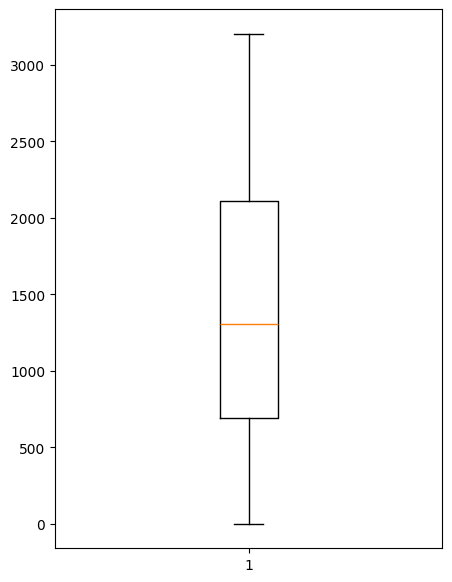

In [ ]:
#creating dataset
np.random.seed(10)
Data=data["Price"]
print(Data)
fig = plt.figure(figsize=(5, 7))

#creating plot
plt.boxplot(Data)

#show plot
plt.show()

 **Calculate The Correlation**

In [ ]:
data.corr()

Brand      Year     Model   Car/Suv     Title  \
Brand              1.000000  0.046514  0.063368  0.025342  0.124375   
Year               0.046514  1.000000  0.102917 -0.071489  0.960832   
Model              0.063368  0.102917  1.000000  0.137929  0.114345   
Car/Suv            0.025342 -0.071489  0.137929  1.000000 -0.082669   
Title              0.124375  0.960832  0.114345 -0.082669  1.000000   
UsedOrNew          0.010278 -0.334893 -0.082779  0.261380 -0.381758   
Transmission       0.065248 -0.257720  0.004087  0.014812 -0.254640   
Engine            -0.099036 -0.251543 -0.008100  0.256039 -0.242101   
DriveType         -0.143519 -0.118483 -0.240738 -0.237608 -0.129189   
FuelType           0.023136 -0.084529 -0.179448 -0.231890 -0.062583   
FuelConsumption   -0.004966  0.239131  0.029435 -0.014139  0.186340   
Kilometres         0.015986  0.151227 -0.016903  0.009830  0.160399   
ColourExtInt       0.089182  0.076829  0.025448  0.035957  0.079104   
Location          -0.015475 -0.043190  0.002085  0.054967 -0.045258   
CylindersinEngine -0.127543 -0.239134 -0.013208  0.168315 -0.236766   
BodyType          -0.013127  0.012192  0.102275  0.836735  0.013998   
Doors              0.077065  0.116972 -0.015755 -0.202439  0.112461   
Seats              0.011755  0.060925  0.064086  0.176141  0.064064   
Price              0.029467  0.190092  0.050807  0.022905  0.271778   

                   UsedOrNew  Transmission    Engine  DriveType  FuelType  \
Brand               0.010278      0.065248 -0.099036  -0.143519  0.023136   
Year               -0.334893     -0.257720 -0.251543  -0.118483 -0.084529   
Model              -0.082779      0.004087 -0.008100  -0.240738 -0.179448   
Car/Suv             0.261380      0.014812  0.256039  -0.237608 -0.231890   
Title              -0.381758     -0.254640 -0.242101  -0.129189 -0.062583   
UsedOrNew           1.000000      0.097839  0.117410   0.052727  0.036509   
Transmission        0.097839      1.000000  0.035523   0.011252 -0.074474   
Engine              0.117410      0.035523  1.000000   0.017333 -0.074886   
DriveType           0.052727      0.011252  0.017333   1.000000  0.340310   
FuelType            0.036509     -0.074474 -0.074886   0.340310  1.000000   
FuelConsumption    -0.036658     -0.080949 -0.397571  -0.149160 -0.114826   
Kilometres          0.114150     -0.056939 -0.044611  -0.001065  0.057447   
ColourExtInt        0.036212      0.044691 -0.039424  -0.007548 -0.105640   
Location            0.049424      0.019062  0.016480   0.008695  0.029875   
CylindersinEngine   0.105338      0.015421  0.921346   0.047680  0.023205   
BodyType           -0.033648     -0.010729  0.233828  -0.235617 -0.236627   
Doors              -0.034727     -0.175581 -0.272870  -0.122623  0.119839   
Seats              -0.037776     -0.229102  0.042407  -0.306310 -0.017441   
Price              -0.198825     -0.061016  0.091930  -0.136720 -0.126273   

                   FuelConsumption  Kilometres  ColourExtInt  Location  \
Brand                    -0.004966    0.015986      0.089182 -0.015475   
Year                      0.239131    0.151227      0.076829 -0.043190   
Model                     0.029435   -0.016903      0.025448  0.002085   
Car/Suv                  -0.014139    0.009830      0.035957  0.054967   
Title                     0.186340    0.160399      0.079104 -0.045258   
UsedOrNew                -0.036658    0.114150      0.036212  0.049424   
Transmission             -0.080949   -0.056939      0.044691  0.019062   
Engine                   -0.397571   -0.044611     -0.039424  0.016480   
DriveType                -0.149160   -0.001065     -0.007548  0.008695   
FuelType                 -0.114826    0.057447     -0.105640  0.029875   
FuelConsumption           1.000000    0.011316      0.038714 -0.014019   
Kilometres                0.011316    1.000000      0.033244 -0.001111   
ColourExtInt              0.038714    0.033244      1.000000 -0.003266   
Location                

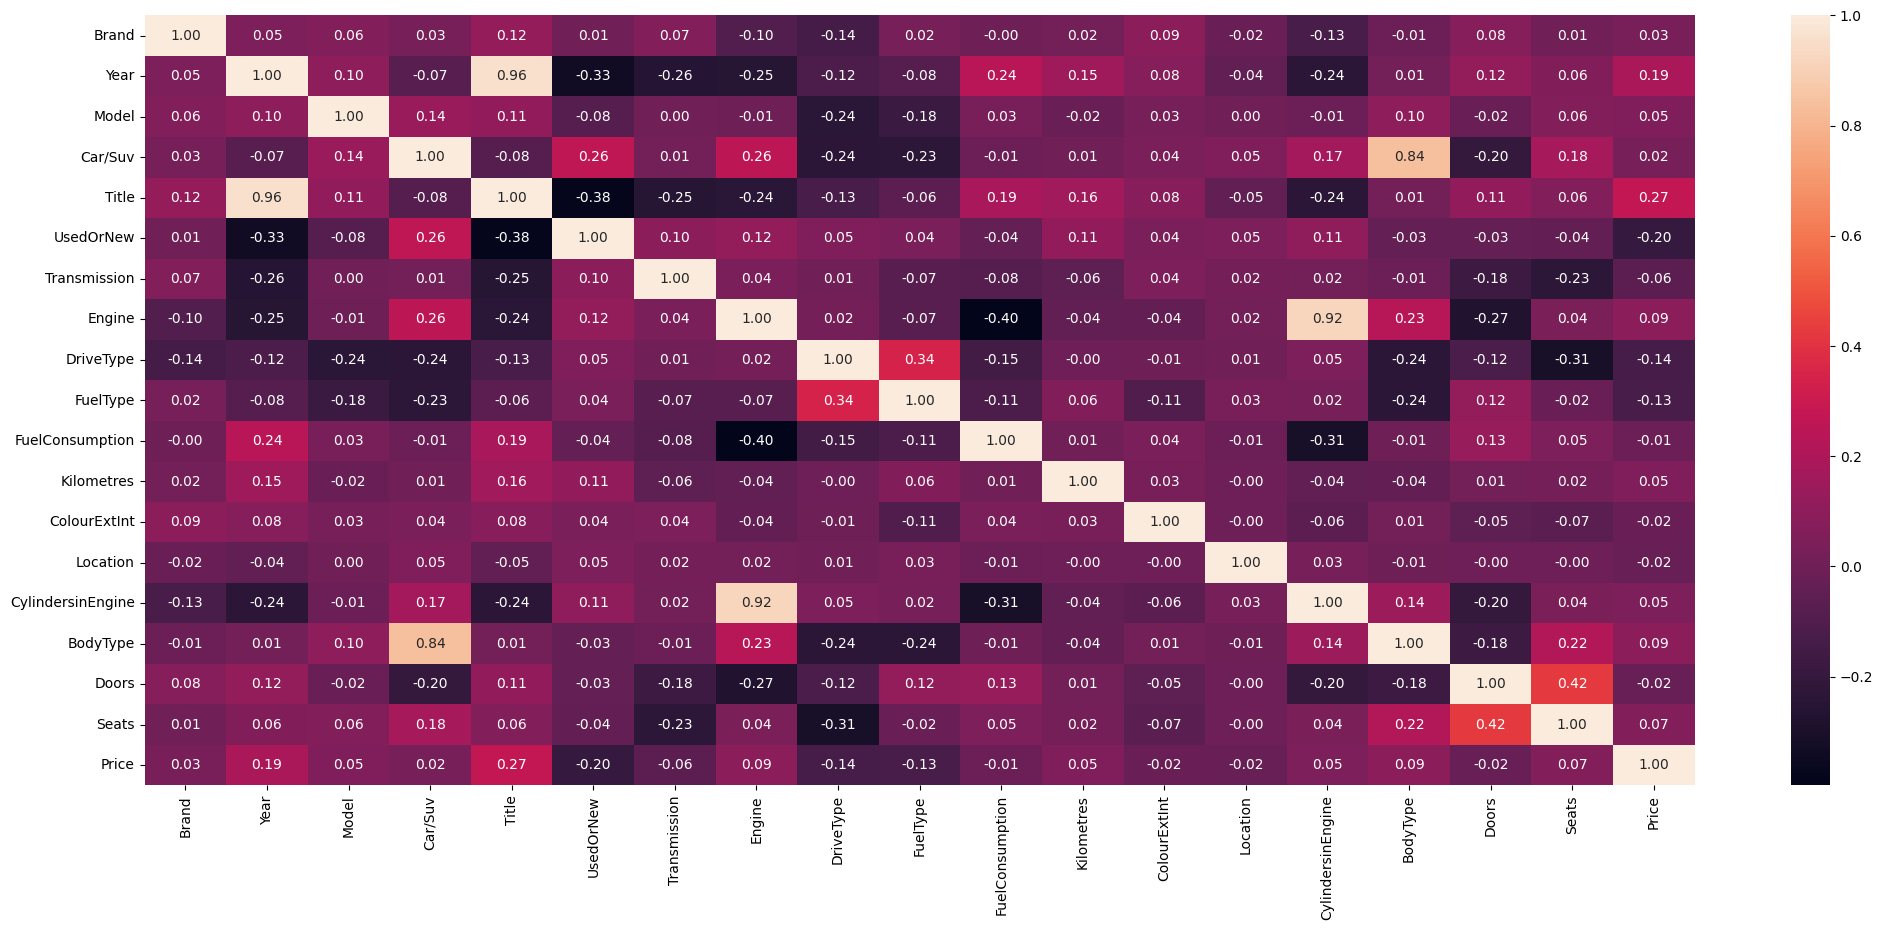

In [ ]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.13.2


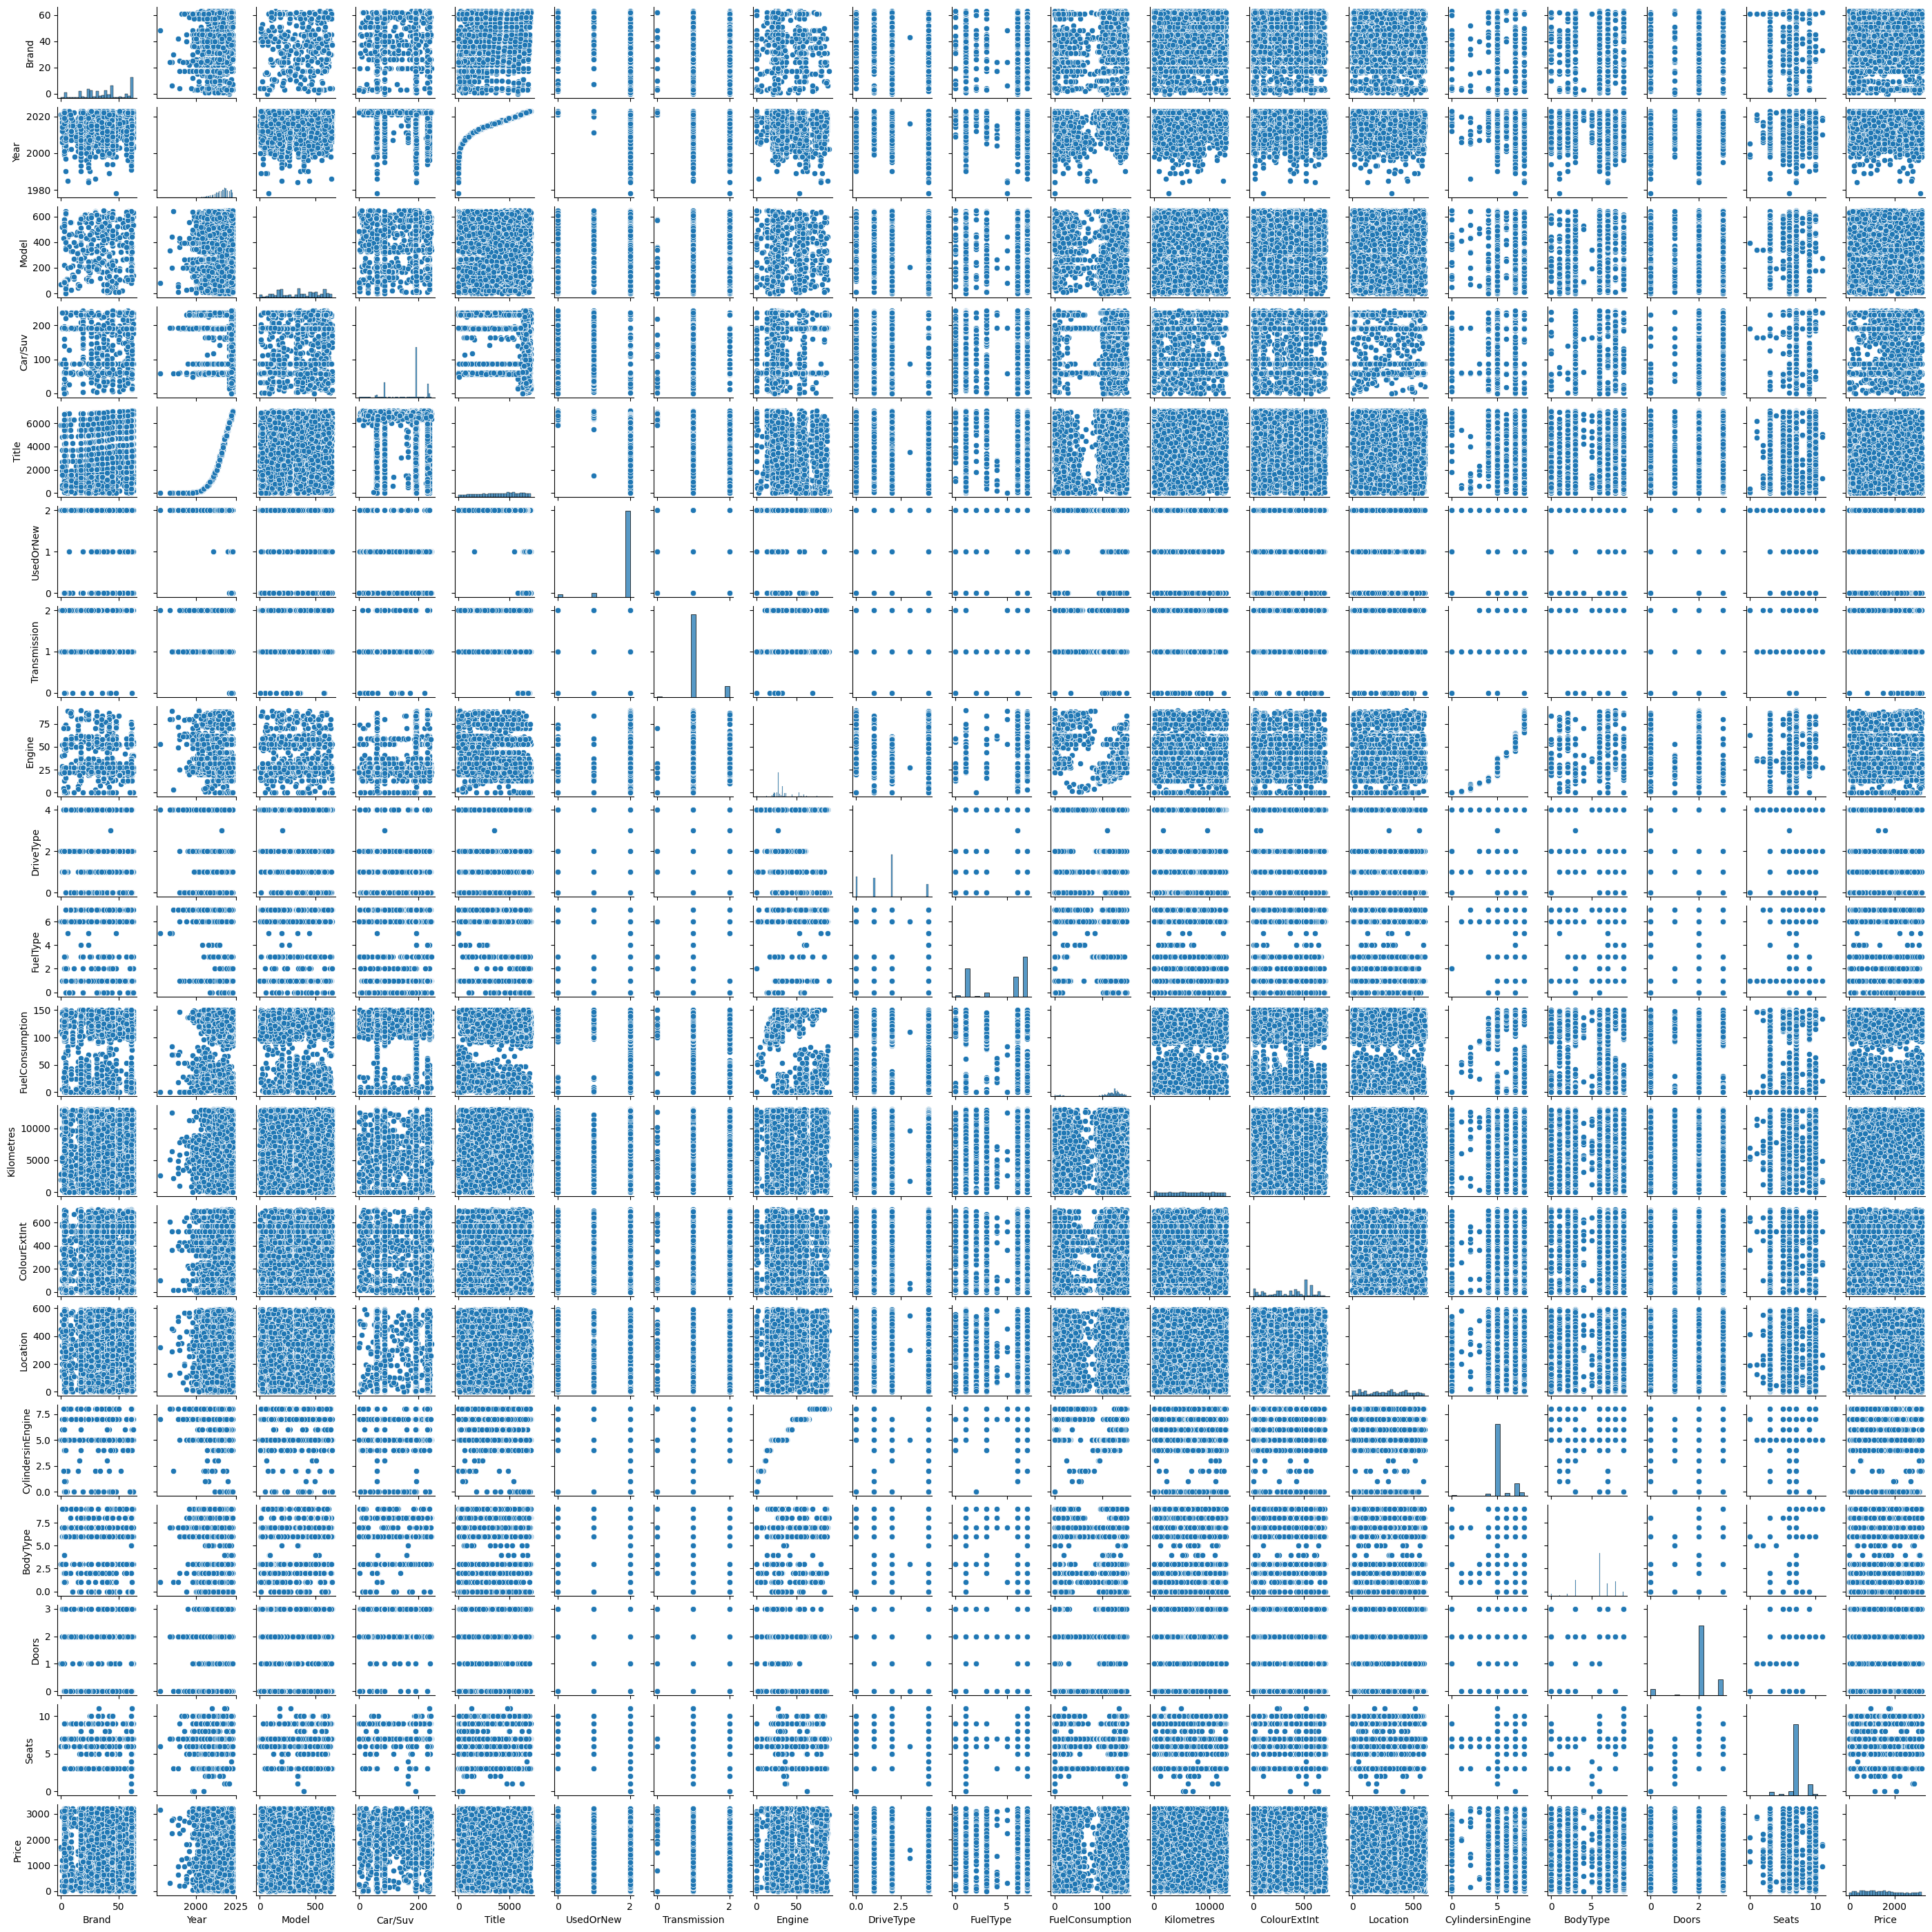

In [ ]:
sns.pairplot(data, height=1.5);
plt.show()

**Split Data into Training and Testing Sets**

In [ ]:
# Data split
X = data.drop(columns=['Price','Brand','Car/Suv'])
Y = data['Price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, and only transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame (optional, for easier interpretation)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verify the scaling (mean should be close to 0, std should be close to 1 for X_train)
print("Training data after scaling:")
print(X_train_scaled.describe())


Training data after scaling:
               Year         Model         Title     UsedOrNew  Transmission  \
count  1.166800e+04  1.166800e+04  1.166800e+04  1.166800e+04  1.166800e+04   
mean  -1.786709e-14  7.855675e-17  8.769125e-17 -1.132679e-16  3.422395e-16   
std    1.000043e+00  1.000043e+00  1.000043e+00  1.000043e+00  1.000043e+00   
min   -7.778881e+00 -1.997526e+00 -1.980424e+00 -4.840901e+00 -3.423219e+00   
25%   -6.560031e-01 -8.995225e-01 -8.262039e-01  2.651949e-01 -3.524018e-01   
50%    1.580400e-01  1.266542e-02  7.821405e-02  2.651949e-01 -3.524018e-01   
75%    7.685724e-01  8.798070e-01  8.290251e-01  2.651949e-01 -3.524018e-01   
max    1.379105e+00  1.634333e+00  1.639289e+00  2.651949e-01  2.718415e+00   

             Engine     DriveType      FuelType  FuelConsumption  \
count  1.166800e+04  1.166800e+04  1.166800e+04     1.166800e+04   
mean  -2.094847e-16 -1.826901e-17 -1.010885e-16     5.115323e-17   
std    1.000043e+00  1.000043e+00  1.000043e+00     1.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
min_max_scaler = MinMaxScaler()

# Fit and transform the training data, and only transform the test data
X_train_minmax_scaled = min_max_scaler.fit_transform(X_train)
X_test_minmax_scaled = min_max_scaler.transform(X_test)

# Convert scaled data back to DataFrame (optional, for easier interpretation)
X_train_minmax_scaled = pd.DataFrame(X_train_minmax_scaled, columns=X_train.columns)
X_test_minmax_scaled = pd.DataFrame(X_test_minmax_scaled, columns=X_test.columns)

# Verify the scaling (values should now be between 0 and 1)
print("Training data after MinMax scaling:")
print(X_train_minmax_scaled.describe())


Training data after MinMax scaling:
               Year         Model         Title     UsedOrNew  Transmission  \
count  11668.000000  11668.000000  11668.000000  11668.000000  11668.000000   
mean       0.849410      0.550001      0.547122      0.948063      0.557379   
std        0.109199      0.275353      0.276277      0.195853      0.162830   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.777778      0.302326      0.318871      1.000000      0.500000   
50%        0.866667      0.553488      0.568730      1.000000      0.500000   
75%        0.933333      0.792248      0.776153      1.000000      0.500000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             Engine     DriveType      FuelType  FuelConsumption  \
count  11668.000000  11668.000000  11668.000000     11668.000000   
mean       0.381115      0.411146      0.674898         0.735736   
std        0.164971      0.303326      0.381105 

**Define a function for model evaluation**


 **linear regression**

In [ ]:
# Creating and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [ ]:
print("Linear Regression Model\n")

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")


# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

# Printing the results
print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Linear Regression Model

	Training Data Evaluation:
		MAE: 607.8036971446511
		MSE: 627173.066941384
		RMSE: 791.9425906853248
		R²: 19.62303449112128

	Testing Data Evaluation:
		MAE: 606.8302108393817
		MSE: 630513.3152908359
		RMSE: 794.0486857182221
		R²: 16.583111661000416


**Visualize the actual prices and Predicted prices**

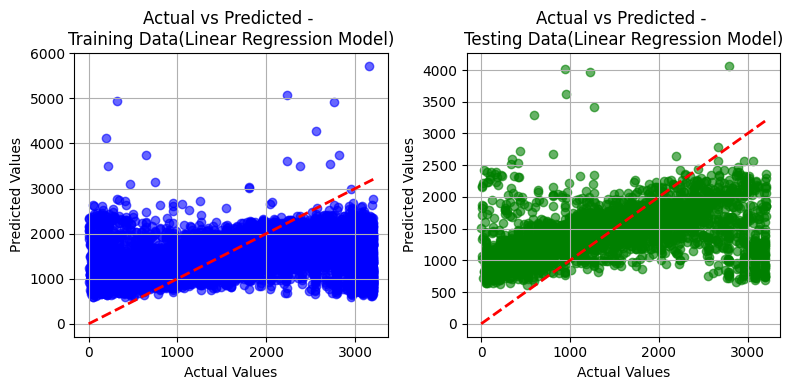

In [ ]:
plt.figure(figsize=(8, 4))

# Scatter plot for Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data(Linear Regression Model)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Scatter plot for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data(Linear Regression Model)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

**Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)
print("Lasso Regression -\n")
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Lasso Regression -

	Training Data Evaluation:
		MAE: 607.8036971446511
		MSE: 627173.066941384
		RMSE: 791.9425906853248
		R²: 19.62303449112128

	Testing Data Evaluation:
		MAE: 606.8302108393817
		MSE: 630513.3152908359
		RMSE: 794.0486857182221
		R²: 16.583111661000416


**Visualize the actual prices and Predicted prices**

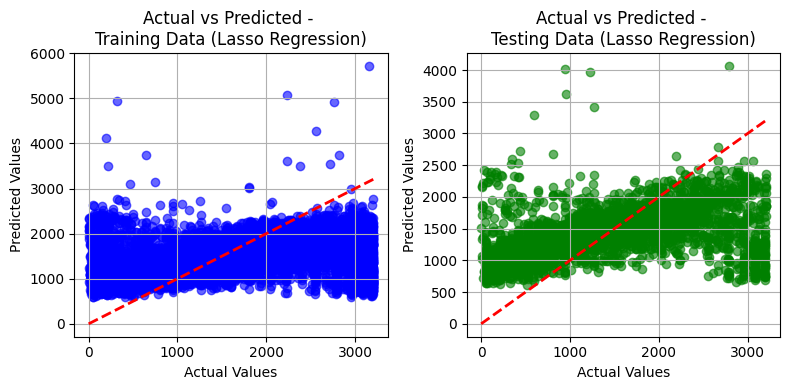

In [ ]:
plt.figure(figsize=(8, 4))

# Plotting Actual vs Predicted for Training Data
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data (Lasso Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data (Lasso Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training the Random Forest Regression model
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# Making predictions
Y_train_pred = rf.predict(X_train)
Y_test_pred = rf.predict(X_test)

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)


print("Random Forest Regression\n")
# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Random Forest Regression

	Training Data Evaluation:
		MAE: 134.56401949369052
		MSE: 49409.36948277467
		RMSE: 222.28218435757435
		R²: 93.66781611637096

	Testing Data Evaluation:
		MAE: 357.33348863376744
		MSE: 347452.8818483266
		RMSE: 589.4513396781167
		R²: 54.03199655690645


**Visualize the actual prices and Predicted prices**

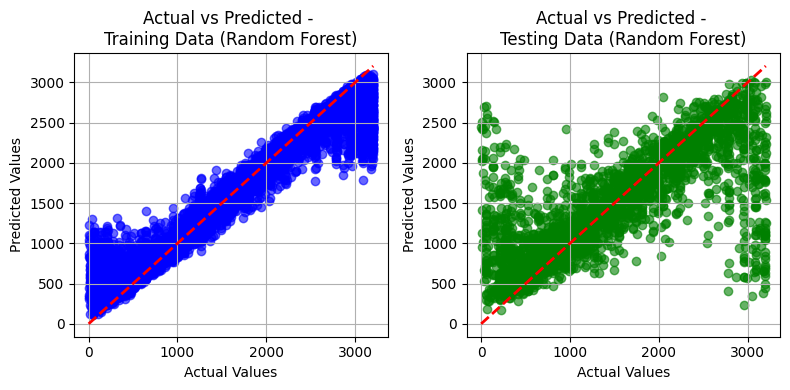

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data (Random Forest)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data (Random Forest)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

 **XGBoost Regression**

In [ ]:
from xgboost import XGBRegressor

# Creating and training the XGBoost Regression model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1)
xgb.fit(X_train, Y_train)

# Making predictions
Y_train_pred = xgb.predict(X_train)
Y_test_pred = xgb.predict(X_test)

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

print("XGBoost Regression-\n")

# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

XGBoost Regression-

	Training Data Evaluation:
		MAE: 123.03562019171272
		MSE: 36448.63670457069
		RMSE: 190.91526053349085
		R²: 95.32883167266846

	Testing Data Evaluation:
		MAE: 356.34845559183583
		MSE: 357331.93139310594
		RMSE: 597.7724746030934
		R²: 52.72500514984131


**Visualization Code**

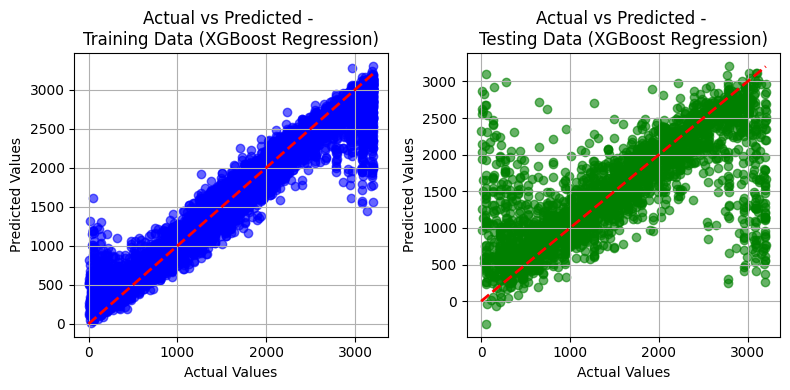

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data (XGBoost Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data (XGBoost Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

**Robust Regression (RANSAC)**

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
# Feature Scaling - RANSAC can be sensitive to the scale of features, so we scale them
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scaling the features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

In [ ]:
# Creating and training the RANSAC model
ransac = RANSACRegressor(random_state=2)
ransac.fit(X_train_scaled, Y_train_scaled.ravel())  # Use ravel to convert target to 1D

# Making predictions
Y_train_pred_scaled = ransac.predict(X_train_scaled)
Y_test_pred_scaled = ransac.predict(X_test_scaled)

# Inverse transform the scaled predictions to get them back to the original scale
Y_train_pred = scaler_Y.inverse_transform(Y_train_pred_scaled.reshape(-1, 1))
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled.reshape(-1, 1))

In [ ]:
# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)


# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("Robust Regression (RANSAC) -\n")

# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {-train_r2*100}")

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Robust Regression (RANSAC) -

	Training Data Evaluation:
		MAE: 753.093194484362
		MSE: 1305399.286671665
		RMSE: 1142.5407155421924
		R²: 67.2967781474098

	Testing Data Evaluation:
		MAE: 771.6089554843437
		MSE: 1369325.4002860293
		RMSE: 1170.18178087254
		R²: -81.16169991228064


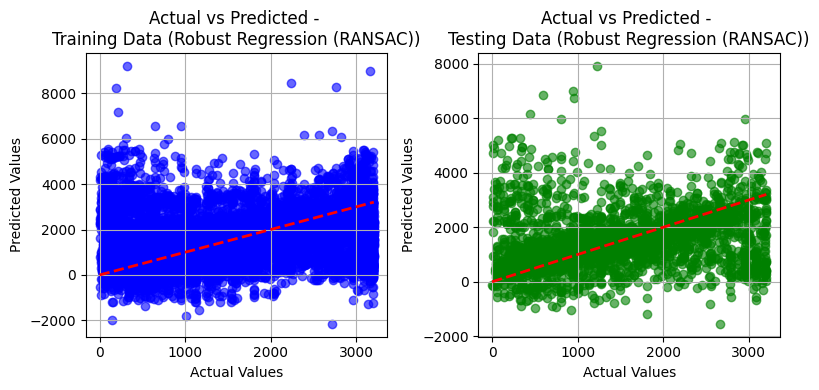

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data (Robust Regression (RANSAC))")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data (Robust Regression (RANSAC))")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

 **Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Feature Scaling - Polynomial Regression can benefit from scaling the features
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scaling the features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

# Create Polynomial features (degree can be changed based on the need)
degree = 3  # You can tune this value
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Create and train the linear regression model on the polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train_scaled)

# Making predictions
Y_train_pred_scaled = lin_reg.predict(X_train_poly)
Y_test_pred_scaled = lin_reg.predict(X_test_poly)

# Inverse transform the scaled predictions to get them back to the original scale
Y_train_pred = scaler_Y.inverse_transform(Y_train_pred_scaled.reshape(-1, 1))
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled.reshape(-1, 1))

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

In [ ]:
print(f"Polynomial Regression (Degree {degree})-\n")
# Printing the results
print(f"\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Polynomial Regression (Degree 3)-

	Training Data Evaluation:
		MAE: 421.93602270290046
		MSE: 365843.8776237996
		RMSE: 604.8502935634566
		R²: 52.95740910668852

	Testing Data Evaluation:
		MAE: 93083056212.29115
		MSE: 1.2641440231441659e+25
		RMSE: 3555480309528.0474
		R²: -1.674054164798099e+21


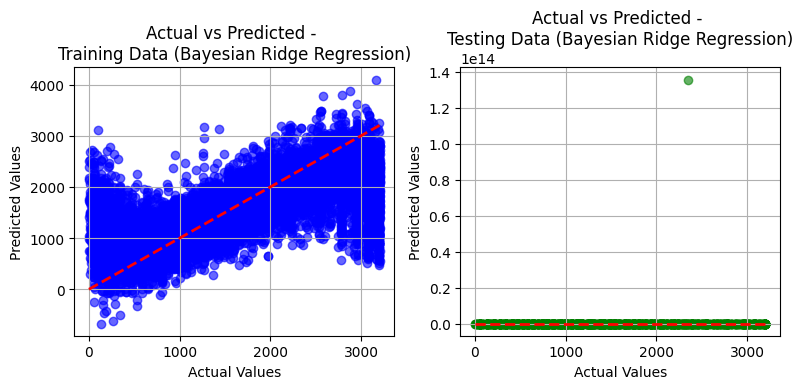

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

**Bayesian Ridge Regression**

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Feature Scaling - Bayesian Ridge Regression can benefit from scaling the features
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Scaling the features
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the target variable
Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1, 1))

# Create and train the Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train_scaled, Y_train_scaled.ravel())

# Making predictions
Y_train_pred_scaled = bayesian_ridge.predict(X_train_scaled)
Y_test_pred_scaled = bayesian_ridge.predict(X_test_scaled)

# Inverse transform the scaled predictions to get them back to the original scale
Y_train_pred = scaler_Y.inverse_transform(Y_train_pred_scaled.reshape(-1, 1))
Y_test_pred = scaler_Y.inverse_transform(Y_test_pred_scaled.reshape(-1, 1))

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)


print("Bayesian Ridge Regression-\n")
# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")

Bayesian Ridge Regression-

	Training Data Evaluation:
		MAE: 609.763408819925
		MSE: 627840.328141918
		RMSE: 792.3637599877458
		R²: 19.26819742088449

	Testing Data Evaluation:
		MAE: 604.2720183774917
		MSE: 624873.9513353285
		RMSE: 790.4896908469639
		R²: 17.250501402129025


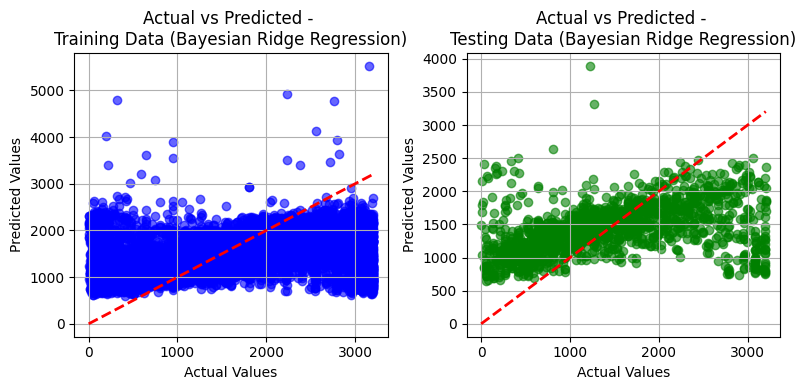

In [ ]:
# Plotting Actual vs Predicted for Training Data
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTraining Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plotting Actual vs Predicted for Testing Data
plt.subplot(1, 2, 2)
plt.scatter(Y_test, Y_test_pred, color='green', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted - \nTesting Data (Bayesian Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()

**Determine the Best Model**

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
# Adding the intercept term
x = np.column_stack((np.ones(X.shape[0]), X))

In [ ]:
# Calculate the coefficients (beta)
beta = np.linalg.inv(x.T @ x) @ x.T @ Y

In [ ]:
# Calculate the predictions
y_pred = x @ beta

In [ ]:
# Calculate residuals
residuals = Y - y_pred


In [ ]:
# Calculate the variance and standard error
sigma_squared = np.sum(residuals**2) / (len(Y) - 2)
standard_error = np.sqrt(np.diagonal(sigma_squared * np.linalg.inv(x.T @ x)))

In [ ]:
# Calculate t-statistics
t_stats = beta / standard_error


In [ ]:
# Calculate p-values
p_values = [2 * (1 - stats.t.cdf(np.abs(t), len(Y) - 2)) for t in t_stats]

In [ ]:
# Print the results
print("Coefficients:", beta)
print("P-values:", p_values)

Coefficients: [ 3.24659013e+05 -1.61010909e+02 -1.08896300e-01  5.02404847e-01
 -1.96573102e+02 -9.85879702e+00  1.69600140e+01 -4.03859954e+01
 -2.90760829e+01  1.04575898e+00  7.05260970e-03 -1.81498555e-01
 -2.23446945e-02 -1.24140875e+02  1.11442297e+00 -1.76221414e+01
  1.61446420e+01]
P-values: [0.0, 0.0, 0.004862858782455293, 0.0, 0.0, 0.6494390860431571, 0.0, 1.6283263626348798e-10, 0.0, 7.375450672419959e-08, 8.559664902607622e-05, 3.353232069791545e-08, 0.568619701649689, 1.2359224754732168e-11, 0.7691906840826406, 0.14004583218645505, 0.018762285938972667]


 **P_ Value for Random forest Regression.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitting the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, Y_train)

# Permutation importance
perm_importance = permutation_importance(rf, X_test, Y_test, n_repeats=30, random_state=42)

# Display feature importance and approximate p-values
feature_importances = perm_importance.importances_mean
p_values = [1.0 if imp <= 0 else (sum(perm_importance.importances[i] <= 0) / len(perm_importance.importances[i]))
            for i, imp in enumerate(perm_importance.importances_mean)]

results = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances,
    "P-value Approximation": p_values
}).sort_values(by="Importance", ascending=False)

print(results)

              Feature  Importance  P-value Approximation
2               Title    0.707755               0.000000
5              Engine    0.259157               0.000000
7            FuelType    0.138310               0.000000
6           DriveType    0.103691               0.000000
9          Kilometres    0.071671               0.000000
8     FuelConsumption    0.059491               0.000000
1               Model    0.050205               0.000000
12  CylindersinEngine    0.013113               0.000000
13           BodyType    0.010348               0.000000
11           Location    0.010213               0.000000
4        Transmission    0.008205               0.000000
15              Seats    0.005897               0.000000
14              Doors    0.003588               0.033333
10       ColourExtInt    0.002733               0.166667
3           UsedOrNew    0.001162               0.000000
0                Year    0.000535               0.200000


 **P_ Value for XGboost Regression.**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import pandas as pd

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fitting the Random Forest model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1)
xgb.fit(X_train, Y_train)

# Permutation importance
perm_importance = permutation_importance(xgb, X_test, Y_test, n_repeats=30, random_state=42)

# Display feature importance and approximate p-values
feature_importances = perm_importance.importances_mean
p_values = [1.0 if imp <= 0 else (sum(perm_importance.importances[i] <= 0) / len(perm_importance.importances[i]))
            for i, imp in enumerate(perm_importance.importances_mean)]

results = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances,
    "P-value Approximation": p_values
}).sort_values(by="Importance", ascending=False)

print(results)


              Feature  Importance  P-value Approximation
2               Title    0.687580               0.000000
5              Engine    0.283704               0.000000
7            FuelType    0.134735               0.000000
6           DriveType    0.097424               0.000000
9          Kilometres    0.084958               0.000000
1               Model    0.072896               0.000000
8     FuelConsumption    0.057328               0.000000
11           Location    0.012385               0.000000
13           BodyType    0.011143               0.000000
4        Transmission    0.011074               0.000000
14              Doors    0.008089               0.000000
15              Seats    0.008073               0.000000
0                Year    0.006921               0.000000
10       ColourExtInt    0.003905               0.200000
3           UsedOrNew    0.000075               0.533333
12  CylindersinEngine    0.000000               1.000000


**Actual vs Predicted Values**

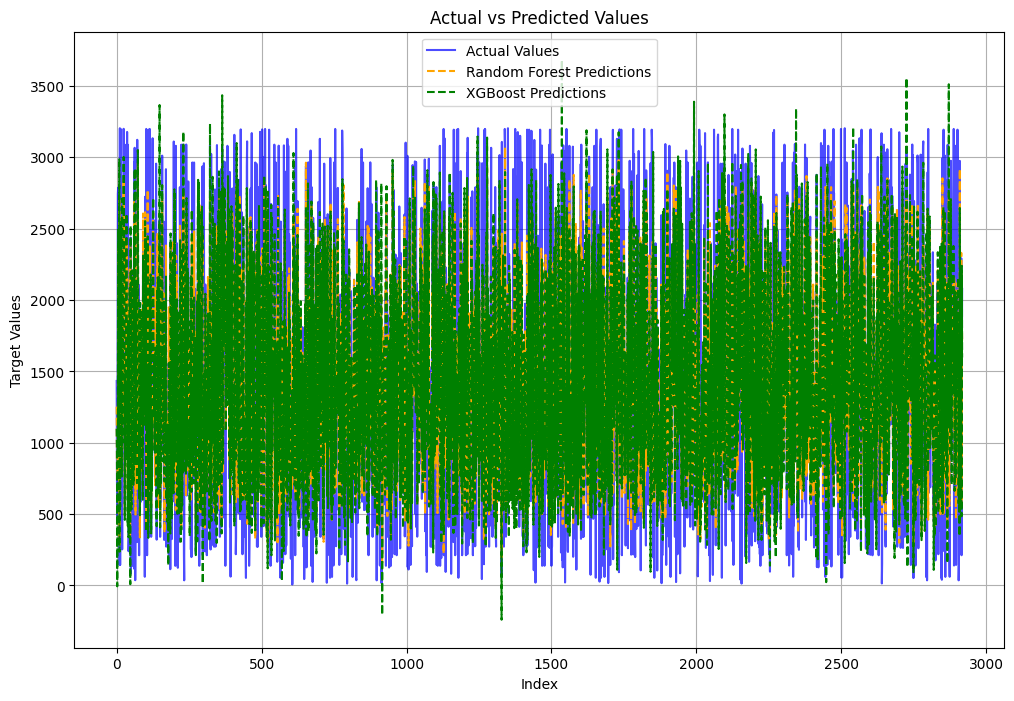

In [ ]:
# Actual vs Predicted Values
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# Step 1: Scale the target variable (optional if scaling needed)
scaler = MinMaxScaler()
Y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))

# Step 2: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_scaled, test_size=0.2, random_state=42)

# Step 3: Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train.ravel())

# Step 4: Train XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, Y_train.ravel())

# Step 5: Make predictions
Y_pred_rf = rf_model.predict(X_test)
Y_pred_xgb = xgb_model.predict(X_test)

# Step 6: Inverse transform predictions (if scaled)
Y_test_original = scaler.inverse_transform(Y_test)
Y_pred_rf_original = scaler.inverse_transform(Y_pred_rf.reshape(-1, 1))
Y_pred_xgb_original = scaler.inverse_transform(Y_pred_xgb.reshape(-1, 1))

# Step 7: Plot Actual vs Predicted values
plt.figure(figsize=(12, 8))
plt.plot(range(len(Y_test_original)), Y_test_original, label='Actual Values', color='blue', alpha=0.7)
plt.plot(range(len(Y_test_original)), Y_pred_rf_original, label='Random Forest Predictions', color='orange', linestyle='--')
plt.plot(range(len(Y_test_original)), Y_pred_xgb_original, label='XGBoost Predictions', color='green', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Target Values')
plt.legend()
plt.grid(True)
plt.show()

**Ensemble**

In [ ]:
# To create an ensemble of the three regression models (`RandomForestRegressor`, `XGBRegressor`, and `RANSACRegressor`), we can use a stacking technique. Stacking involves training a meta-model that combines the predictions from the base models to improve the overall performance.

# Here is the code to implement the ensemble using stacking:

# ```python
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression  # Meta-model
from sklearn.pipeline import Pipeline

# Random Forest model
rf = RandomForestRegressor()

# XGBoost model
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=1)

# RANSAC model (with scaling pipeline)
ransac_pipeline = Pipeline([
    ('scaler_X', StandardScaler()),
    ('ransac', RANSACRegressor(random_state=2))
])

# Creating the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('random_forest', rf),
        ('xgboost', xgb),
        ('ransac', ransac_pipeline)
    ],
    final_estimator=LinearRegression(),  # Meta-model
    passthrough=False  # Use base model predictions as inputs to the meta-model
)

# Train the Stacking Regressor
stacking_regressor.fit(X_train, Y_train)

# Making predictions
Y_train_pred = stacking_regressor.predict(X_train)
Y_test_pred = stacking_regressor.predict(X_test)

# Evaluation Metrics for Training Data
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(Y_train, Y_train_pred)

print("Stacking Regression -\n")
# Printing the results
print("\tTraining Data Evaluation:")
print(f"\t\tMAE: {train_mae}")
print(f"\t\tMSE: {train_mse}")
print(f"\t\tRMSE: {train_rmse}")
print(f"\t\tR²: {train_r2*100}")

# Evaluation Metrics for Testing Data
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\n\tTesting Data Evaluation:")
print(f"\t\tMAE: {test_mae}")
print(f"\t\tMSE: {test_mse}")
print(f"\t\tRMSE: {test_rmse}")
print(f"\t\tR²: {test_r2*100}")
# ```

### Explanation:
# 1. **Base Models**:
#    - `RandomForestRegressor`
#    - `XGBRegressor`
#    - `RANSACRegressor` (wrapped in a `Pipeline` to include feature scaling)

# 2. **Meta-Model**:
#    - A `LinearRegression` model is used as the meta-model, but you can experiment with other models like `Ridge` or `ElasticNet`.

# 3. **Stacking**:
#    - The `StackingRegressor` combines the predictions of the base models and passes them to the meta-model for final predictions.

# 4. **Fit and Evaluate**:
#    - The stacking model is trained on the training data, and its performance is evaluated on both the training and test datasets.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_stacking.py:970: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stacking Regression -

	Training Data Evaluation:
		MAE: 0.03916748654576683
		MSE: 0.003810351404579121
		RMSE: 0.06172804390695627
		R²: 94.97246804990377

	Testing Data Evaluation:
		MAE: 0.11068726759613051
		MSE: 0.03456565392629128
		RMSE: 0.18591840663659767
		R²: 53.61296086604895


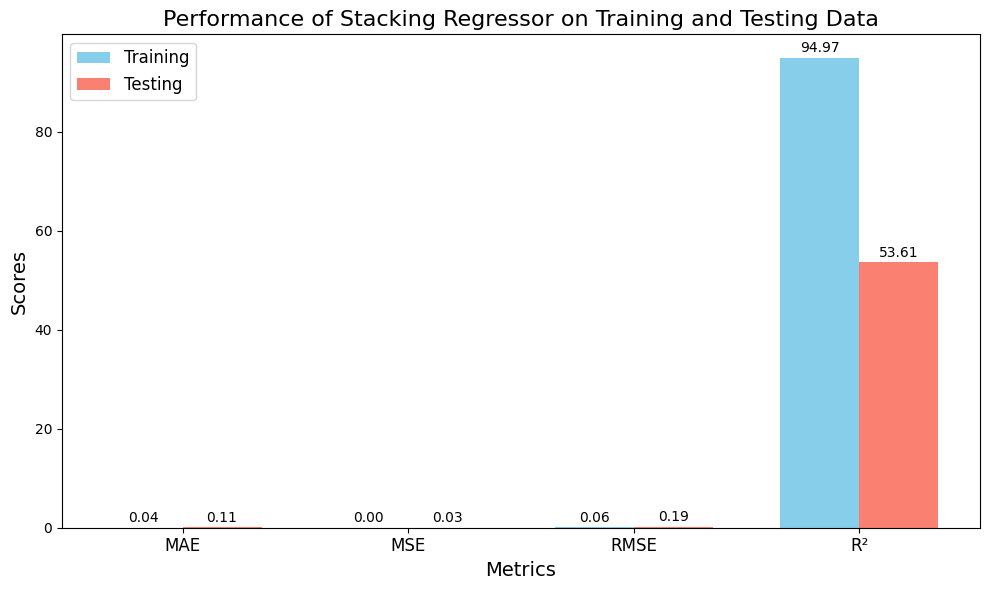

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics for visualization
metrics = ['MAE', 'MSE', 'RMSE', 'R²']
train_scores = [train_mae, train_mse, train_rmse, train_r2 * 100]  # R² as percentage
test_scores = [test_mae, test_mse, test_rmse, test_r2 * 100]       # R² as percentage

x = np.arange(len(metrics))  # Number of metrics

# Plotting
plt.figure(figsize=(10, 6))
bar_width = 0.35

# Bar plots for Training and Testing scores
plt.bar(x - bar_width/2, train_scores, width=bar_width, color='skyblue', label='Training')
plt.bar(x + bar_width/2, test_scores, width=bar_width, color='salmon', label='Testing')

# Adding annotations to the bars
for i in range(len(metrics)):
    plt.text(x[i] - bar_width/2, train_scores[i] + 0.5, f"{train_scores[i]:.2f}", ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + bar_width/2, test_scores[i] + 0.5, f"{test_scores[i]:.2f}", ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.xticks(x, metrics, fontsize=12)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Performance of Stacking Regressor on Training and Testing Data', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()
